In [1]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

The first (and probably the main) component of Machine Learning is data. Let us generate some artificial (synthetic) data. 

In [2]:
# Step 1: Generate synthetic data
np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

The second component of Machine Learning is a model, i.e., a (typically very large) set of hypothesis maps. Some widely used ML models are parametrized, i.e., each hypothesis map is fully determined by a finite list of parameters. The example below defines a model that is parameterized by two numbers: `m` and `b` 

In [3]:
# Step 2: Hypothesis function
# m,b are parameter of hypothesis 

def hypothesis(x, m, b):
    return m * x + b

The third component of Machine Learning is a loss function which evaluates the usefulness of the predictions delivered by a hypothesis map when applied to some data point. One prominent example for a loss function, implemented below, is the squared error loss. 

In [4]:
# Step 3: Compute cost function
def compute_cost(m, b, x, y):
    return ((hypothesis(x, m, b) - y)**2).mean() / 2

Most machine learning methods use iterative optimization methods to optimize/find/learn model parameters (which select a hypothesis map) that result in a minimum average loss on a training set. Probably the most popular class of iteration optimization methods is obtained by variations of the basic gradient descent step. 

In [5]:
# Step 4: Initialize parameters for gradient descent
m_init = 0
b_init = 0
learning_rate = 0.1
iterations = 30

# Gradient descent function
def gradient_descent(x, y, m, b, learning_rate):
    N = len(y)
    y_pred = hypothesis(x, m, b)
    m_grad = (1/N) * np.sum((y_pred - y) * x)
    b_grad = (1/N) * np.sum(y_pred - y)
    m -= learning_rate * m_grad
    b -= learning_rate * b_grad
    return m, b

#  update function
def update(i):
    global m_init, b_init
    m_init, b_init = gradient_descent(x, y, m_init, b_init, learning_rate)
    line.set_ydata(hypothesis(x, m_init, b_init))
    title_text.set_text(f'Iteration {i+1}/{iterations}\nLoss: {compute_cost(m_init, b_init, x, y):.4f}')
    return line, title_text


The code snippet below depicts the evolution of model parameter during the execution of gradient descent steps. 

In [6]:
%matplotlib notebook
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

m_init = 0
b_init = 0

# Code setup for data generation, hypothesis and gradient_descent remains same

# Prepare the animation
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)
ax.set_xlim(0, 2)
ax.set_ylim(y.min() - 1, y.max() + 1)

ax.set_xlabel('x')
ax.set_ylabel('y')
title_text = ax.text(0.5, 0.95, '', transform=ax.transAxes, ha='center')

# Prepare the plot
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)
line, = ax.plot(x, hypothesis(x, m_init, b_init), 'r-', linewidth=2)
ax.set_xlim(0, 2)
ax.set_ylim(y.min() - 1, y.max() + 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
title_text = ax.text(0.5, 0.95, '', transform=ax.transAxes, ha='center')

# Create and display animation
ani = FuncAnimation(fig, update, frames=iterations, repeat=False)
HTML(ani.to_jshtml())  # Use to_jshtml() for interactive control within the notebook


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

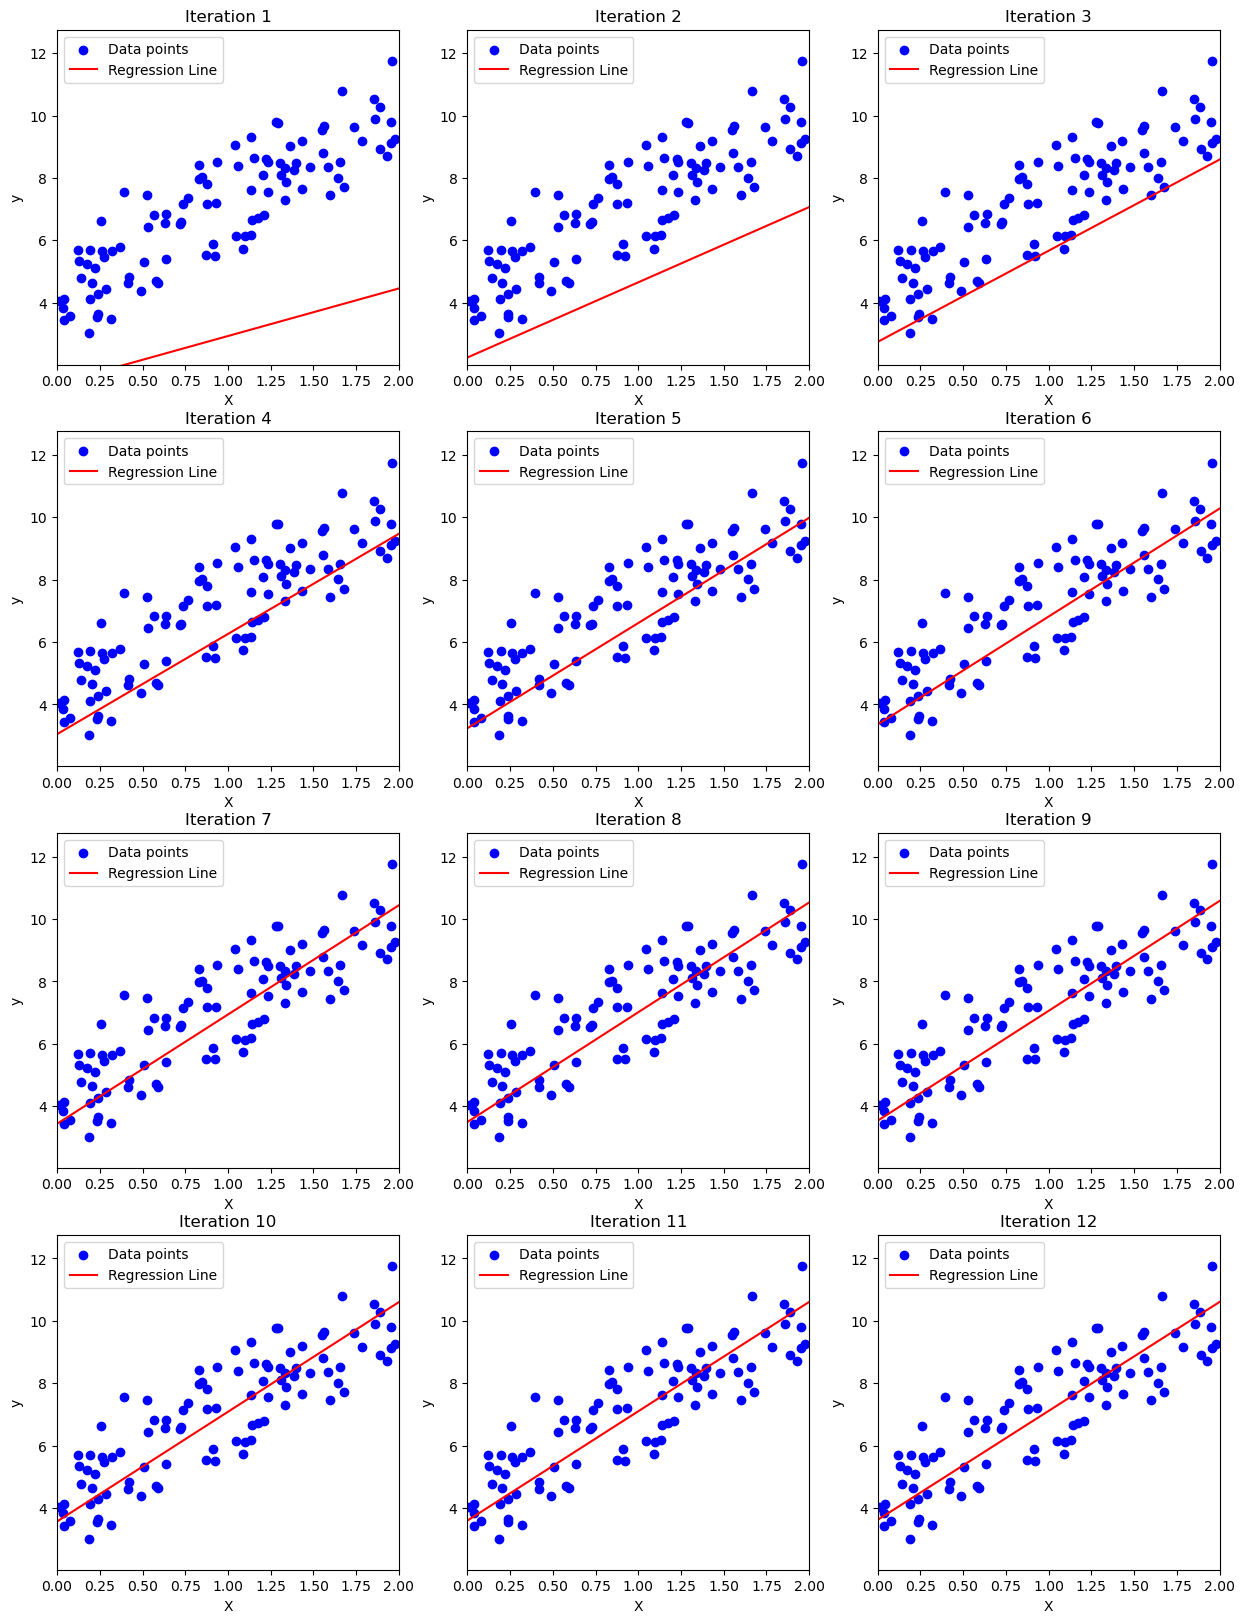

In [7]:
%matplotlib inline

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Parameters for gradient descent
learning_rate = 0.1

cols = 3

n_iterations = cols*4

# Initial values for the linear regression model (y = theta_0 + theta_1 * x)
theta_0, theta_1 = 0, 0

# Number of columns for subplotting

rows = n_iterations // cols + (n_iterations % cols != 0)

# Create figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten to ease the indexing

for iteration in range(n_iterations):
    # Calculate predictions
    y_pred = theta_0 + theta_1 * X
    
    # Calculate gradients
    error = y_pred - y
    grad_theta_0 = 2 * error.mean()
    grad_theta_1 = 2 * (X * error).mean()
    
    # Update parameters
    theta_0 -= learning_rate * grad_theta_0
    theta_1 -= learning_rate * grad_theta_1
    
    # Plotting on designated subplot
    ax = axes[iteration]
    ax.scatter(X, y, color='blue', marker='o', label='Data points')
    ax.plot([0, 2], [theta_0, theta_0 + theta_1 * 2], color='red', label='Regression Line')
    ax.set_title(f'Iteration {iteration + 1}')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_xlim(0, 2)
    ax.set_ylim(np.min(y)-1, np.max(y)+1)
    ax.legend()
